# Cluster SO/DO Extrema

In [1]:
# imports
from importlib import reload

import numpy as np
from scipy.interpolate import interp1d

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils
from siosandbox.cugn import io as cugn_io
from siosandbox import plot_utils

# Load up

In [2]:
line = '90'

# Load
items = cugn_io.load_line(line)
grid_tbl = items['grid_tbl']
ds = items['ds']

# Fill
grid_utils.fill_in_grid(grid_tbl, ds)

In [3]:
perc = 80.
grid_outliers, _, _ = grid_utils.gen_outliers(line, perc)

In [4]:
extrem = grid_outliers.SO > 1.1
grid_extrem = grid_outliers[extrem].copy()
grid_extrem.head()

,depth,profile,row,col,doxy,doxy_p,time,lon,lat,z,CT,SA,sigma0,SO,N,chla,T
782,0,32958,15,18,277.438868,99.488491,2017-03-14 02:17:03,-118.227115,33.265208,10,15.488374,33.434623,24.549290,1.116404,7.360446,0.285907,15.456250
783,0,32959,15,18,276.052619,98.976982,2017-03-14 03:41:20,-118.217615,33.270125,10,15.243413,33.434927,24.603163,1.105516,6.704290,0.271055,15.211909
788,0,32964,15,19,298.647665,99.616858,2017-03-14 15:53:33,-118.129770,33.313952,10,14.946715,33.443485,24.673905,1.189120,7.679979,0.324720,14.916154
789,0,32965,13,19,292.036344,99.696970,2017-03-14 18:54:13,-118.106223,33.320505,10,14.787911,33.351972,24.638233,1.158375,13.925959,0.397494,14.755500
790,0,32966,13,17,309.040496,99.794239,2017-03-14 21:51:29,-118.080510,33.323907,10,15.265308,33.331187,24.519477,1.237211,13.226413,0.369575,15.231154


# Cluster

In [5]:
clusters.generate_clusters(grid_extrem)

Found 38 unique clusters


In [6]:
cluster_stats = clusters.cluster_stats(grid_extrem)

# Plot a few

In [7]:
uni_cidx, cnt_cidx = np.unique(grid_extrem.cluster, return_counts=True)

In [8]:
uni_cidx[0:3], cnt_cidx

(array([-1,  0,  1]),
 array([ 62,  44,  56,  40, 106,  19,  29,  26,   9,  44,  20,  31,   6,
         12,  21,  43,   9,  19,  31,   8,   5, 103,  15,   5,  10,  20,
          7, 119,  11,  59,   5,   7,  71,  26,  12,  21,  30,  18]))

## SO

In [15]:
cidx = 0 # DO leads; close to coast, N is elevated
cidx = 1 # DO leads; chla very elevated; on-shore; T is uninteresting; mainly sub-surface; doxy, chla turned off??
cidx = 2 # Odd gap in measurements; N very elevated; T uninteresting
cidx = 3 # Huge DO rise; T uninteresting; N very elevated  [2018 June, July; a bit off-shore]
cidx = 4 # Offshore, chlA + DO; N only slightly elevated
cidx = 5 # Hugh N; diunrnal signal; GOOFY-CHECK WITH DAN [2018, August]
cidx = 6 # N, DO, Chla;  T uninteresting; nearshore [2019 Feb/Mar]
cidx = 7 # Separate, weak cluster from [2019 Feb/Mar]
cidx = 8 # Strong diurnal; very elevated N; stationary glider?; mainly surface [2019 April]
cidx = 9 # Spike in doxy, N, chla [2019 June]
cidx = 10 # Possible diurnal; on-shore; elevated T, N [2019 August]
cidx = 11 # Very weak [2019 Nov]
cidx = 12 # Also weak; N elevated [2020 May]
cidx = 13 # On shore spike in N, doxy, low T?! [2020 April]
cidx = 14 # CHECK-WITH-DAN; Elevated everything! [2020 May]
cidx = 15 # Weak, onshore cluster; high N; diurnal? [2020 July/Aug]
cidx = 16 # Off-shore; elevated N but not special; high Chla [2020 August]
cidx = 17 # Highest N; mainly sub-surface; colder water? [2020 Sep]
cidx = 18 # Weak on-shore cluster; high chla (or erroneous) [2021 Mar]
cidx = 19 # Very weak episode [2021 Apr]
cidx = 20 # Onshore, high N, cold? [2021 Aug]
cidx = 21 # Brief, sub-surface spike off-shore; lower N! [2021 Sep]
cidx = 22 # Weak episode; near shore, high N [2021 Oct]
cidx = 23 # Weak, onshore episode; higher N [2021 Oct]
cidx = 24 # CHECK-WITH-DAN; at shore, high doxy, low N [2022 Feb]
cidx = 25 # Weak, erroneous? [2022 Mar]
cidx = 26 # CHECK-WITH-DAN; Large episode but odd data?? high N [2022 May]
cidx = 27 # Onshore, sub-surface episode; high N [2022 June]
cidx = 28 # Onshore, high doxy, high N episode [2022 Aug]
cidx = 29 # Weak onshore; elevated N [2022 Oct]
cidx = 30 # Weak onshore, high N [2022 Oct]
cidx = 31 # Onshore, elevated N, doxy boost [2023 Mar]
cidx = 32 # Subsurface; offshore, high N; bounching around?? CHECK-WITH-DAN [2018 Aug]
cidx = 33 # Weak episode; subsurface, onshore; high N; elevated doxy [2020 Aug]
cidx = 34 # Subsurface, high N, near shore [2022 June]
cidx = 35 # Onshore, subsurface, high doxy, high N [2022 Aug]
cidx = 36 # Subsurface, high N, near shore [2018 Aug]

cidx = 10 # 2019 Aug
cidx = 17 # 2020 Sep
cidx = 20 # 2021 Aug

# Bad
cidx = 14
cidx = 24

in_cluster = grid_extrem.cluster == cidx

tmin = grid_extrem.time[in_cluster].min() - pandas.Timedelta('2W')
tmax = grid_extrem.time[in_cluster].max() + pandas.Timedelta('2W')
tmin, tmax

(Timestamp('2022-02-13 23:05:23'), Timestamp('2022-03-18 07:58:35'))

In [16]:
ds_in_tcluster = (ds.time >= tmin) & (ds.time <= tmax)
np.sum(ds_in_tcluster.values)

597

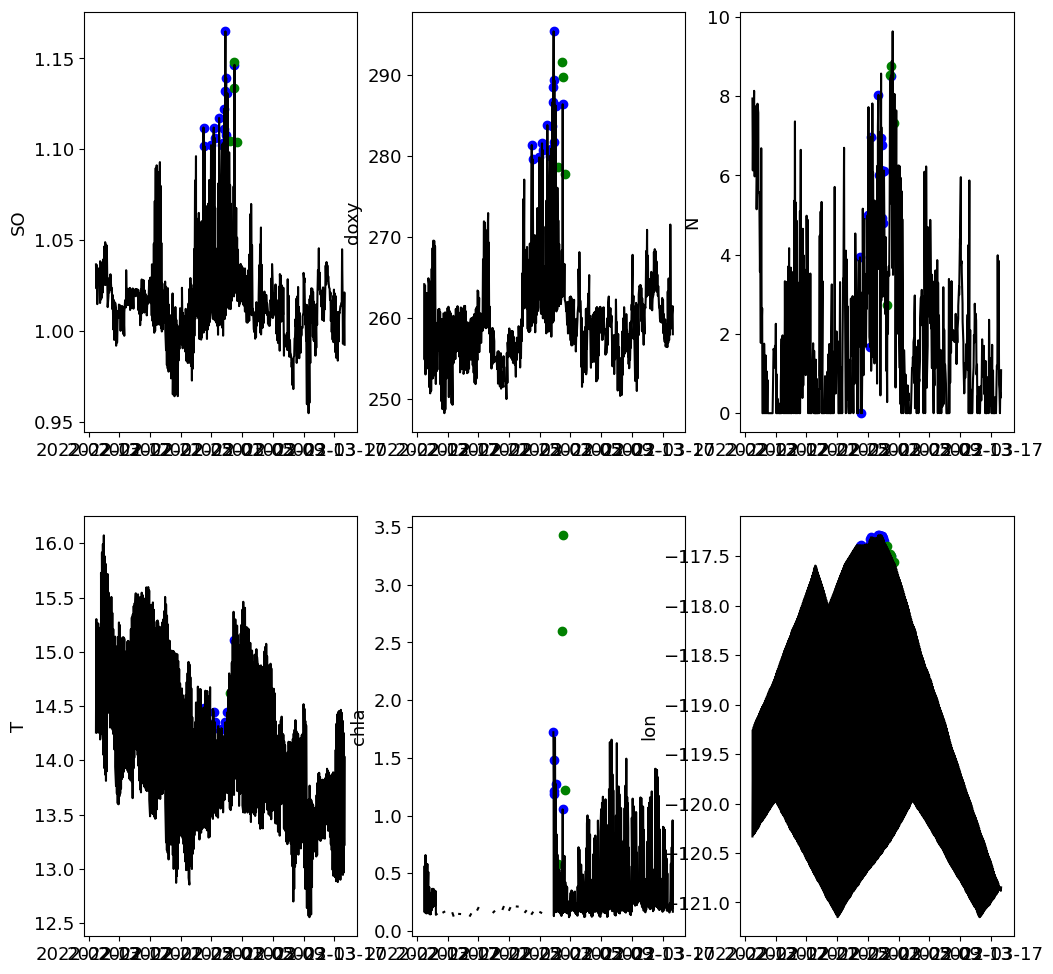

In [17]:
#
fig = plt.figure(figsize=(12,12))
plt.clf()

gs = gridspec.GridSpec(2,3)

for ss, metric in enumerate(['SO', 'doxy', 'N', 'T', 'chla', 'lon']):
    ax = plt.subplot(gs[ss])

    if metric == 'T':
        ds_metric = 'temperature'
    elif metric == 'chla':
        ds_metric = 'chlorophyll_a'
    else:
        ds_metric = metric

    # Plot all
    srt = np.argsort(ds.time[ds_in_tcluster].values)
    plt_depth = 0
    if metric in ['lon']:
        ax.plot(ds.time[ds_in_tcluster][srt], ds[ds_metric][ds_in_tcluster][srt], 'k-')
    else:
        ax.plot(ds.time[ds_in_tcluster][srt], ds[ds_metric][plt_depth,ds_in_tcluster][srt], 'k-')

    for depth, clr in zip(np.arange(3), ['b', 'g', 'r']):
        at_d = grid_extrem.depth[in_cluster] == depth
        ax.scatter(grid_extrem.time[in_cluster][at_d], grid_extrem[metric][in_cluster][at_d], color=clr)
        
    ax.set_ylabel(metric)

    plot_utils.set_fontsize(ax, 13.)

plt.show()